In [54]:
#utf-8
#arima时序模型
import pandas as pd

In [25]:
import matplotlib.pylab as plt
#import matplotlib.pyplot as plt

In [26]:
import numpy as np

In [27]:
#读取数据，指定日期列为指标，Pandas自动将“日期”列识别为Datetime格式
#data = pd.read_excel(discfile, index_col = u'日期')
data = pd.read_excel('test.xlsx','Sheet1')
data.info()
#y_1 = data['b']
#type(y_1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
time    80 non-null int64
a       80 non-null float64
b       80 non-null float64
c       80 non-null float64
d       80 non-null float64
e       80 non-null float64
f       80 non-null float64
dtypes: float64(6), int64(1)
memory usage: 4.5 KB


In [28]:
data.head(10)

,time,a,b,c,d,e,f
0,8703,5.263051e+07,3.423145e+07,178850.882,1.986349e+06,3.635370e+07,0.054640
1,8706,5.199664e+07,3.487945e+07,184556.733,1.873514e+06,3.568970e+07,0.052495
2,8709,5.452733e+07,3.720817e+07,202435.813,1.648667e+06,3.687188e+07,0.044713
3,8712,5.220097e+07,3.469676e+07,183035.286,2.278954e+06,3.526258e+07,0.064628
4,8803,5.060724e+07,3.135476e+07,164126.416,2.309560e+06,3.391740e+07,0.068094
5,8806,4.985278e+07,3.368308e+07,182473.415,2.176802e+06,3.331315e+07,0.065344
6,8809,5.336319e+07,3.416243e+07,193024.879,1.866568e+06,3.552690e+07,0.052540
7,8812,5.558258e+07,3.626236e+07,197788.959,1.946295e+06,3.639340e+07,0.053479
8,8903,4.879088e+07,3.184859e+07,169754.104,1.408697e+06,3.169385e+07,0.044447
9,8906,5.240948e+07,3.405950e+07,174675.012,1.547775e+06,3.409522e+07,0.045396


In [29]:
data['time']=data['time'].map(lambda time: str((time+191100)*100+1))
data.head()

,time,a,b,c,d,e,f
0,19980301,5.263051e+07,3.423145e+07,178850.882,1986348.708,3.635370e+07,0.054640
1,19980601,5.199664e+07,3.487945e+07,184556.733,1873513.911,3.568970e+07,0.052495
2,19980901,5.452733e+07,3.720817e+07,202435.813,1648666.935,3.687188e+07,0.044713
3,19981201,5.220097e+07,3.469676e+07,183035.286,2278953.683,3.526258e+07,0.064628
4,19990301,5.060724e+07,3.135476e+07,164126.416,2309559.818,3.391740e+07,0.068094


In [30]:
data['time']=pd.to_datetime(data['time'],format='%Y%m%d')
data.set_index('time',inplace=True)
data.head()

,a,b,c,d,e,f
time,,,,,,
1998-03-01,5.263051e+07,3.423145e+07,178850.882,1986348.708,3.635370e+07,0.054640
1998-06-01,5.199664e+07,3.487945e+07,184556.733,1873513.911,3.568970e+07,0.052495
1998-09-01,5.452733e+07,3.720817e+07,202435.813,1648666.935,3.687188e+07,0.044713
1998-12-01,5.220097e+07,3.469676e+07,183035.286,2278953.683,3.526258e+07,0.064628
1999-03-01,5.060724e+07,3.135476e+07,164126.416,2309559.818,3.391740e+07,0.068094


In [31]:
print (data.head())

                       a             b           c            d             e  \
time                                                                            
1998-03-01  5.263051e+07  3.423145e+07  178850.882  1986348.708  3.635370e+07   
1998-06-01  5.199664e+07  3.487945e+07  184556.733  1873513.911  3.568970e+07   
1998-09-01  5.452733e+07  3.720817e+07  202435.813  1648666.935  3.687188e+07   
1998-12-01  5.220097e+07  3.469676e+07  183035.286  2278953.683  3.526258e+07   
1999-03-01  5.060724e+07  3.135476e+07  164126.416  2309559.818  3.391740e+07   

                   f  
time                  
1998-03-01  0.054640  
1998-06-01  0.052495  
1998-09-01  0.044713  
1998-12-01  0.064628  
1999-03-01  0.068094  


In [66]:
y = data['b']
#print (y)
#type(y)

C:\Users\Administrator\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


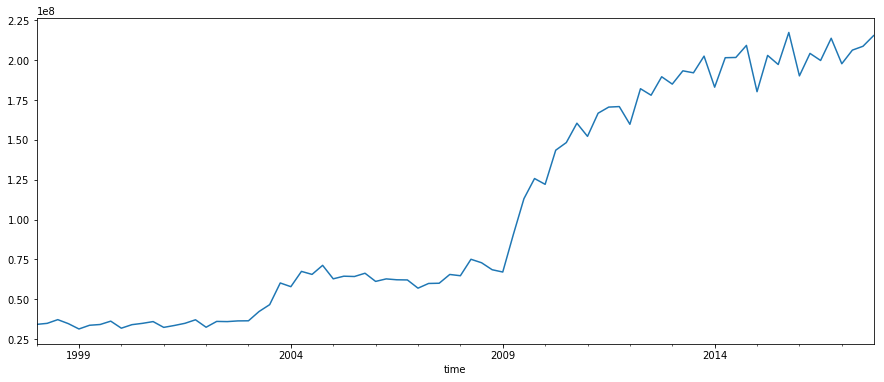

In [67]:
#用来正常显示中文标签
#plt.rcParams['font.sans-serif'] = ['SimHei'] 
#用来正常显示负号
#plt.rcParams['axes.unicode_minus'] = False 
y.plot(figsize=(15,6))
plt.plot(y)
#plt.show()

C:\Users\Administrator\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
C:\Users\Administrator\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


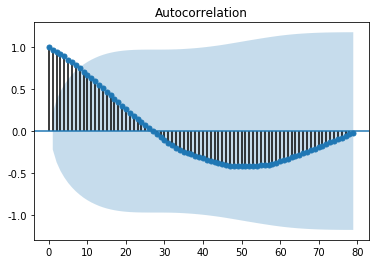

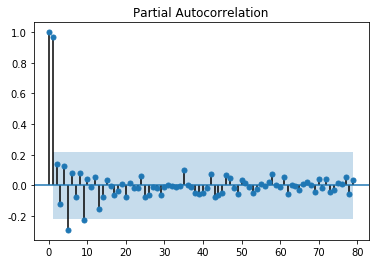

In [76]:
#y_log = np.log(y)
#plt.plot(y_log)
#y_log.plot(figsize=(15, 6))
#plt.show()
%matplotlib inline
import matplotlib.pylab as plt
#plt.rcParams['font.sans-serif']=['SimHei'] #用來正常顯示中文標簽
#plt.rcParams['axes.unicode_minus']=False #用來正常顯示負號
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(y).show() #自相关图
plot_pacf(y).show()

In [78]:
#test ADF 平稳性检测
from statsmodels.tsa.stattools import adfuller as ADF
print(u'ADF检验结果为：', ADF(y))
#返回值依次为adf、pvalue、usedlag、nobs、critical values、
#icbest、regresults、resstore

ADF检验结果为： (-0.65602104245698389, 0.85781467666625955, 4, 75, {'1%': -3.5207131300740739, '5%': -2.9009249540740742, '10%': -2.5877813777777776}, 2309.0135087363319)


C:\Users\Administrator\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


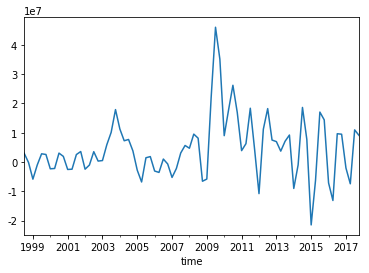

In [188]:
#差分后的结果
D_data = y.diff(periods=2).dropna()
#D_data.columns = [u'销量差分']
#时序图
D_data.plot() 
plt.show()
#print (D_data)

C:\Users\Administrator\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
C:\Users\Administrator\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


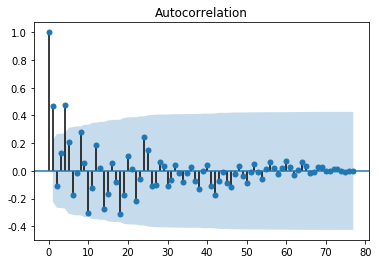

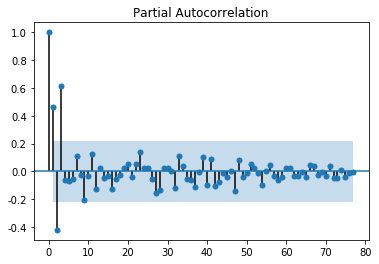

In [190]:
import matplotlib.pylab as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(D_data).show() #自相关图
plot_pacf(D_data).show()


[ 1.          0.46601818 -0.11139333  0.12867892  0.47421484  0.20961837
 -0.17131483 -0.01522729  0.28015422  0.05818897 -0.30215052 -0.1198698
  0.1877761   0.01999671 -0.27826979 -0.16965234  0.05559087 -0.07810824
 -0.31067873 -0.17163551  0.1088854 ] [ 1.          0.46721197 -0.42036529  0.64200202 -0.0822405  -0.07381296
 -0.05984832  0.19067631 -0.08589439 -0.26107794 -0.0285195   0.24729245
 -0.12426454 -0.08307435 -0.10203325  0.09376873 -0.18940852 -0.14037552
  0.03075476  0.02507929  0.04330843]


C:\Users\Administrator\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


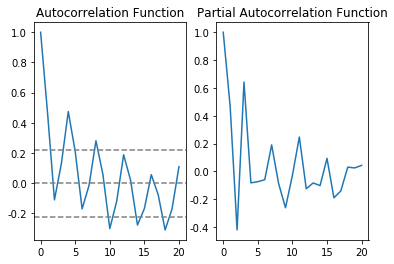

In [200]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(D_data, nlags=20)
lag_pacf = pacf(D_data, nlags=20, method='ols')

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(D_data)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(D_data)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.title('Partial Autocorrelation Function')
plt.tight_layout

print (lag_acf,lag_pacf)

ADF检验结果为： (-2.5644667852312195, 0.100565870567979, 2, 75, {'1%': -3.5207131300740739, '5%': -2.9009249540740742, '10%': -2.5877813777777776}, 2239.8150473839673)


C:\Users\Administrator\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


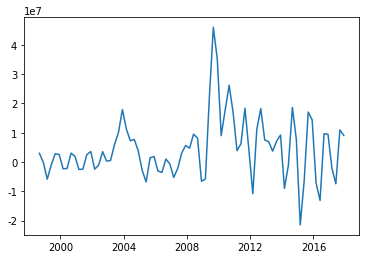

AttributeError: 'Series' object has no attribute 'isstationary'

In [223]:
#test ADF 平稳性检测
from statsmodels.tsa.stattools import adfuller as ADF
print(u'ADF检验结果为：', ADF(D_data))
#返回值依次为adf、pvalue、usedlag、nobs、critical values、
#icbest、regresults、resstore
plt.plot(D_data)
plt.show()

In [192]:
from statsmodels.stats.diagnostic import acorr_ljungbox
print(u'差分序列的白噪声检验结果为：', acorr_ljungbox(y, lags=1)) 

差分序列的白噪声检验结果为： (array([ 77.55542782]), array([  1.29049692e-18]))


In [107]:
# set one step diff, find best p,q
from statsmodels.tsa.arima_model import ARIMA
pmax = int(len(D_data)/10) #一般阶数不超过length/10
qmax = int(len(D_data)/10) #一般阶数不超过length/10
#bic矩阵
bic_matrix = [] 
for p in range(pmax+1):
  tmp = []
  for q in range(qmax+1):
 #存在部分报错，所以用try来跳过报错。
    try: 
      tmp.append(ARIMA(y, (p,1,q)).fit().bic) #data put in y
    except:
      tmp.append(None)
  bic_matrix.append(tmp)

#从中可以找出最小值
bic_matrix = pd.DataFrame(bic_matrix) 
#先用stack展平，然后用idxmin找出最小值位置。
p,q = bic_matrix.stack().idxmin() 

print(u'BIC最小的p值和q值为：%s、%s' %(p,q)) 
#取BIC信息量达到最小的模型阶数，结果p为1，q为1，定阶完成。


C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converg

BIC最小的p值和q值为：4、0


In [239]:
#建立ARIMA(4, 1, 0)模型
model = ARIMA(y, (4,1,0)).fit() 
#给出一份模型报告
#print (p,q)
#model.summary() 
print(model.summary().tables[1])
result_arima = model
#作为期5天的预测，返回预测结果、标准误差、置信区间。
model.forecast(5)
print(model.aic,model.bic,model.hqic)#'AIC:,BIC:,HQIC:

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.293e+06   1.21e+06      1.902      0.061   -6.98e+04    4.66e+06
ar.L1.D.b     -0.0482      0.088     -0.545      0.587      -0.221       0.125
ar.L2.D.b      0.0570      0.084      0.678      0.500      -0.108       0.222
ar.L3.D.b     -0.1740      0.086     -2.030      0.046      -0.342      -0.006
ar.L4.D.b      0.5970      0.088      6.751      0.000       0.424       0.770
2712.852659157087 2727.06934627 2718.54829898


In [216]:
from statsmodels.stats.diagnostic import acorr_ljungbox
print(u'差分序列的白噪声检验结果为：', acorr_ljungbox(model.resid, lags=1)) 

差分序列的白噪声检验结果为： (array([ 0.10952956]), array([ 0.74068036]))


            AC          Q  Prob(>Q)
lag                                
1.0   0.036539   0.109530  0.740680
2.0   0.044275   0.272436  0.872653
3.0   0.004924   0.274477  0.964755
4.0  -0.061836   0.600718  0.962984
5.0  -0.010570   0.610379  0.987523
6.0   0.050747   0.836124  0.991070
7.0  -0.056656   1.121405  0.992625
8.0   0.056643   1.410571  0.994095
9.0  -0.001121   1.410686  0.997757
10.0 -0.206190   5.353433  0.866353
11.0 -0.013267   5.369995  0.911933
12.0  0.117364   6.685542  0.877676
13.0  0.013734   6.703830  0.916762
14.0 -0.052475   6.974912  0.935675
15.0 -0.072854   7.505597  0.942074
16.0  0.000893   7.505678  0.962240
17.0 -0.109582   8.745039  0.947922
18.0 -0.080678   9.427840  0.948993
19.0 -0.112471  10.776942  0.931114
20.0  0.018607  10.814493  0.950892
21.0 -0.025475  10.886092  0.964959
22.0 -0.078669  11.580865  0.965441
23.0  0.018657  11.620640  0.975916
24.0  0.226699  17.599890  0.821975
25.0  0.131383  19.645379  0.765171
26.0 -0.003738  19.647066  0

C:\Users\Administrator\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


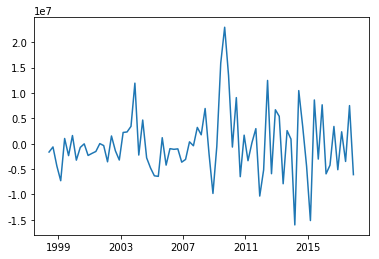

In [221]:
r,q,p = sm.tsa.acf(model.resid, qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))
plt.plot(model.resid)
plt.show()

C:\Users\Administrator\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


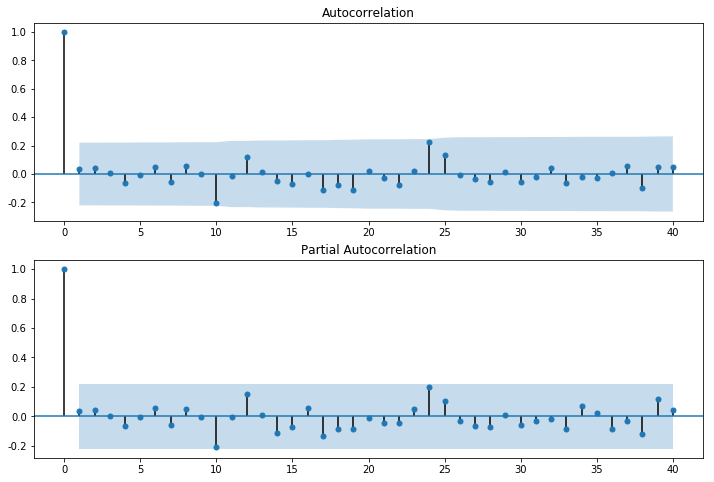

In [217]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(model.resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(model.resid, lags=40, ax=ax2)

C:\Users\Administrator\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


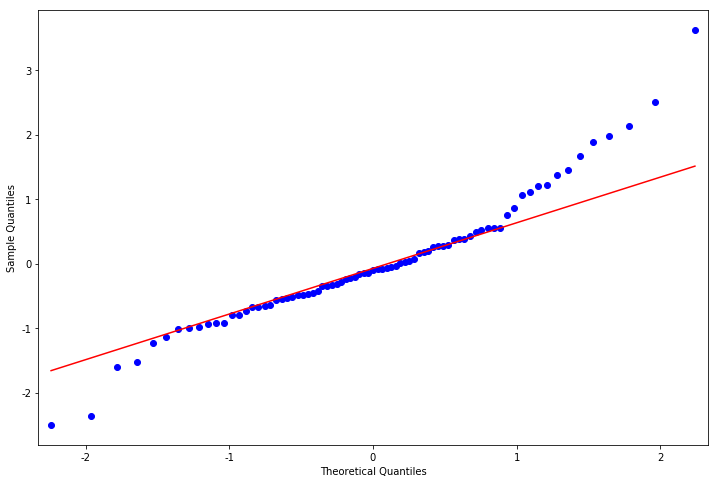

In [227]:
from statsmodels.graphics.api import qqplot
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(model.resid, line='q', ax=ax, fit=True)

In [233]:
predict_sunspots = model.predict('2016-03-01', '2018-03-01', dynamic=True)
print(predict_sunspots)

2016-03-01   -2.128927e+07
2016-06-01    1.805643e+07
2016-09-01   -7.684666e+06
2016-12-01    1.841005e+07
2017-03-01   -1.587465e+07
2017-06-01    1.523489e+07
2017-09-01   -8.127441e+06
2017-12-01    1.631651e+07
2018-03-01   -1.207532e+07
Freq: QS-DEC, dtype: float64


C:\Users\Administrator\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


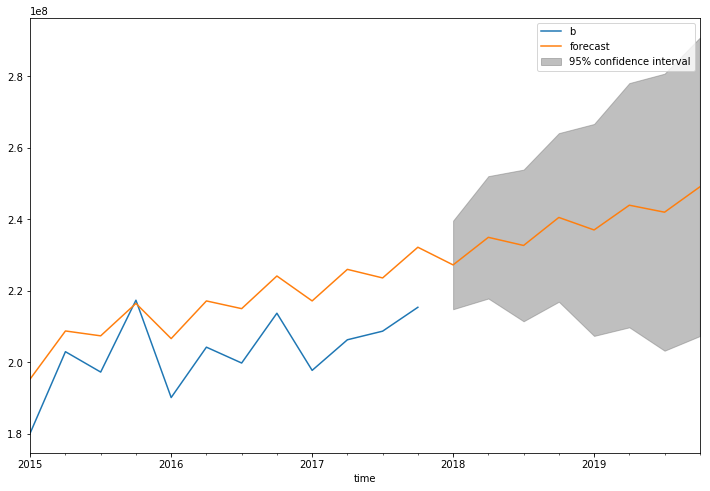

In [242]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = y.ix['2015-03-01':].plot(ax=ax)
fig = model.plot_predict('2015-03-01', '2019-12-01', dynamic=True, ax=ax, plot_insample=False)

In [158]:
# do the AIC text
#import statsmodels.tsa.stattools
#dftest = statsmodels.tsa.stattools.adfuller(y, autolag='BIC')   
#return dftest[1]
#print (dftest[1])

In [159]:
#import statsmodels.tsa.stattools as st
#order = st.arma_order_select_ic(D_data,max_ar=5,max_ma=5,ic=['aic', 'bic', 'hqic']) 
#order.bic_min_order

In [157]:
#建立ARIMA(4, 1, 0)模型
#model = ARIMA(y, (p,1,q)).fit() 
#给出一份模型报告
#model.summary2() 
#作为期5天的预测，返回预测结果、标准误差、置信区间。
#model.forecast(5)
#from statsmodels.tsa.arima_model import ARIMA
#model = ARMA(y, order=(4,0,0))
#result_arma = model.fit(disp=-1, method='css')
#result_arma.summary()

In [210]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(4, 1, 0),
                                seasonal_order=(0, 0, 0,0),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()
print(results.summary().tables[1])
print(results.aic)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0072      0.056     -0.128      0.898      -0.117       0.103
ar.L2          0.0943      0.082      1.147      0.251      -0.067       0.255
ar.L3         -0.1421      0.085     -1.674      0.094      -0.309       0.024
ar.L4          0.6690      0.081      8.264      0.000       0.510       0.828
sigma2      4.275e+13   6.68e-16    6.4e+28      0.000    4.28e+13    4.28e+13
2576.82398254


In [215]:
from statsmodels.stats.diagnostic import acorr_ljungbox
print(u'差分序列的白噪声检验结果为：', acorr_ljungbox(results.resid, lags=1)) 

差分序列的白噪声检验结果为： (array([  1.06113780e-06]), array([ 0.99917809]))


In [214]:
model.plot_diagnostics(figsize=(15, 12))
plt.show()

AttributeError: 'ARIMAResults' object has no attribute 'plot_diagnostics'

In [164]:
pred = result_arima.get_prediction(start=pd.to_datetime('2016-03-01'), dynamic=False)
pred_ci = pred.conf_int()
print (pred_ci)

AttributeError: 'ARIMAResults' object has no attribute 'get_prediction'

NameError: name 'pred' is not defined

C:\Users\Administrator\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


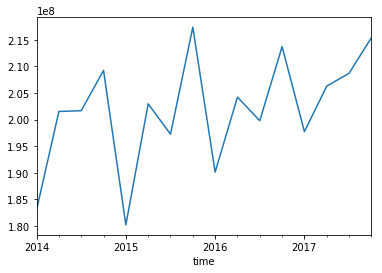

In [193]:
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
#ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()